In [69]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
import seaborn as sns

In [4]:
attributes= pd.read_csv('Data/nodeattribute.csv', delimiter=';')
edgelist= pd.read_csv('Data/edgelist2.csv',delimiter=';')
g_attributes= attributes[attributes['0']=='gene']
g_attributes = g_attributes.assign(color='#F4C2C2')
d_attributes = attributes[attributes['0']=='disease']
d_attributes = d_attributes.assign(color='#7C0A02')



#We need to convert the data frame into a dictionary to use the set_node_attributes 
nodes_attr = attributes.set_index('Id').to_dict(orient='index')
g_nodes_attr = g_attributes.set_index('Id').to_dict(orient='index')
d_nodes_attr= d_attributes.set_index('Id').to_dict(orient='index')

g_nodes= g_attributes['Id'].to_list()
d_nodes=d_attributes['Id'].to_list()
edges= edgelist.values.tolist()


G = nx.Graph()
G.add_nodes_from(g_nodes, bipartite=0)
G.add_nodes_from(d_nodes, bipartite=1 )
nx.set_node_attributes(G, nodes_attr)
G.add_edges_from(edges)


In [5]:
print(nx.info(G))

Graph with 1419 nodes and 2738 edges


0.48806215597210756


In [27]:
#global clustering coefficient
print(nx.transitivity(G))

#average clustering coefficient
print(nx.average_clustering(G))

#local clustering coefficient
#print(nx.clustering(G))

0.2509545296771954
0.48806215597210756


(array([80.,  2.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  1.]),
 array([  0. ,  57.3, 114.6, 171.9, 229.2, 286.5, 343.8, 401.1, 458.4,
        515.7, 573. ]),
 <BarContainer object of 10 artists>)

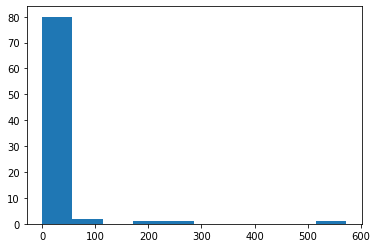

In [43]:
histogram = nx.degree_histogram(G)
fig, ax = plt.subplots()
ax.hist(histogram)

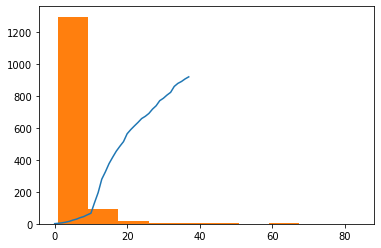

In [66]:
def plot_degree_dist(G):
    degrees = [G.degree(n) for n in G.nodes()]
    degreeCount = Counter(degrees)
    deg, cnt = zip(*degreeCount.items())
    cs = np.cumsum(deg)
    #plt.loglog(degrees, cs, 'bo')
    plt.plot(cs)
    plt.hist(degrees)
    plt.show()

plot_degree_dist(G)

Text(0, 0.5, 'Frequency')

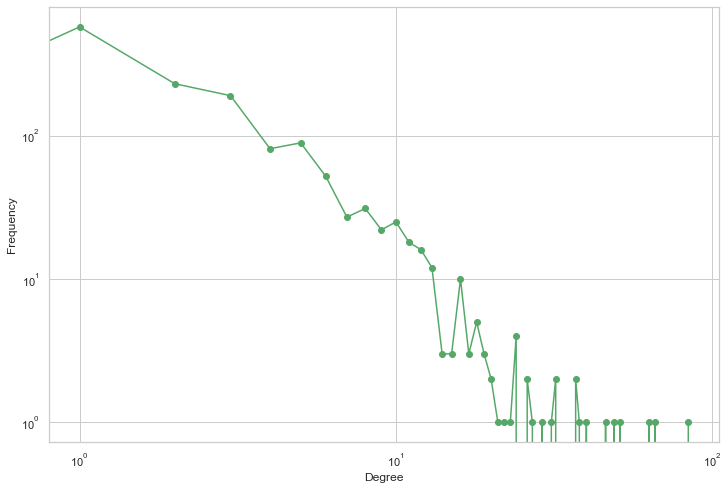

In [70]:
degree_freq = nx.degree_histogram(G)
sns.set_theme(style="whitegrid")

degrees = range(len(degree_freq))
plt.figure(figsize=(12, 8)) 
plt.loglog(degrees, degree_freq,'go-') 
plt.xlabel('Degree')
plt.ylabel('Frequency')
